---Test---
R2 Score:  0.973343640954006
MSE:  0.0014196027271553247
MAE:  0.03080929102338927
---Train---
R2 Score:  0.974547840990065
MSE:  0.0013084344403442511
MAE:  0.02847920781181238

MAPE:  0.11483798556329078


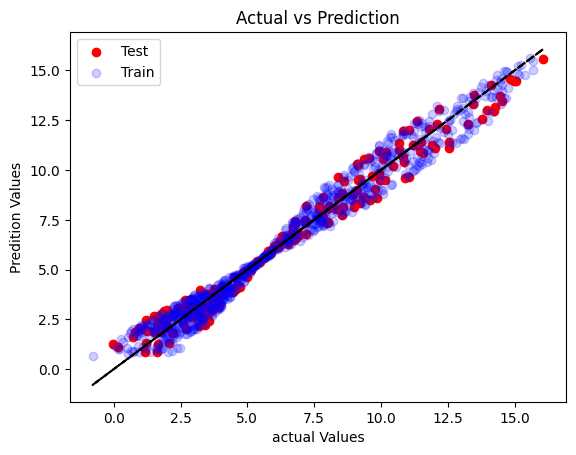

In [1]:
###··· TURBINE DATASET TEST···### 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

# Part 1: Selecting and analyzing the dataset
    #Load the dataset
synthetic_dataset = pd.read_csv("A1-synthetic.txt", sep='\t', header=0)
x = synthetic_dataset[['#v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9']]
y = synthetic_dataset[['z']]
    #Scale the data
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
y_scaled = scaler.fit_transform(y)
    #Split the data
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.2, shuffle=True)

# Part 2: Implementation of NN
model = LinearRegression() 
history = model.fit(x_train, y_train)

# Part 3: Obtaining predictions
y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)
    # Plot the score and errors
print("---Test---")
print("R2 Score: ", r2_score(y_test, y_pred_test))
print("MSE: ", mean_squared_error(y_test, y_pred_test))
print("MAE: ", mean_absolute_error(y_test, y_pred_test))
print("---Train---")
print("R2 Score: ", r2_score(y_train, y_pred_train))
print("MSE: ", mean_squared_error(y_train, y_pred_train))
print("MAE: ", mean_absolute_error(y_train, y_pred_train))
print("")
print("MAPE: ", mean_absolute_percentage_error(y_test, y_pred_test))
    # unscale the data
y_test_unscaled = scaler.inverse_transform(y_test)
y_pred_test_unscaled = scaler.inverse_transform(y_pred_test)
y_train_unscaled = scaler.inverse_transform(y_train)
y_pred_train_unscaled = scaler.inverse_transform(y_pred_train)
    # Plot the data
plt.scatter(y_test_unscaled, y_pred_test_unscaled, color="red", label="Test")
plt.scatter(y_train_unscaled, y_pred_train_unscaled, color="blue", alpha=0.2, label="Train")
plt.xlabel("actual Values")
plt.ylabel("Predition Values")
plt.title("Actual vs Prediction")
plt.plot(y, y, "--",color="black")
plt.legend()
plt.show()
